### Import Seaborn

In [3]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline 
%reload_ext autoreload
%autoreload 2 

### Import Data 

In [5]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [7]:
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


## Distribution Plots 

### Distribution Plot

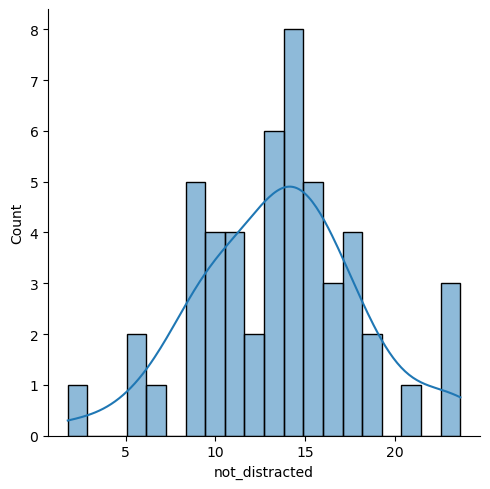

In [15]:
sns.displot(crash_df['not_distracted'], kde = True, bins = 20)

### Joint Plot 

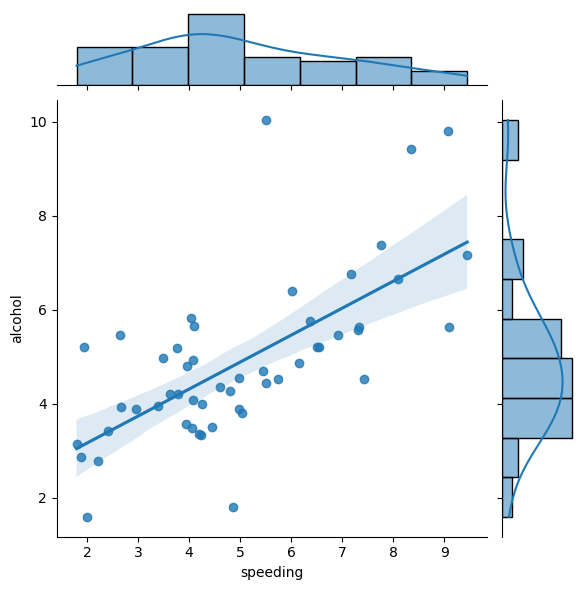

In [26]:
sns.jointplot(x='speeding' , y='alcohol', data= crash_df, kind = 'reg', palette = 'YlGnBu')

### KDE Plot 

<Axes: xlabel='alcohol', ylabel='Density'>

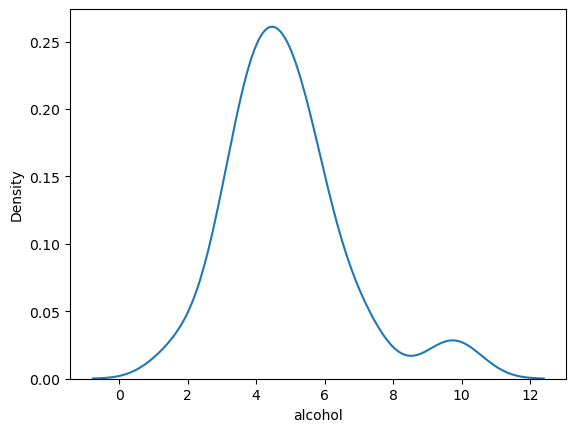

In [30]:
sns.kdeplot(crash_df['alcohol'])

### Pair Plot 

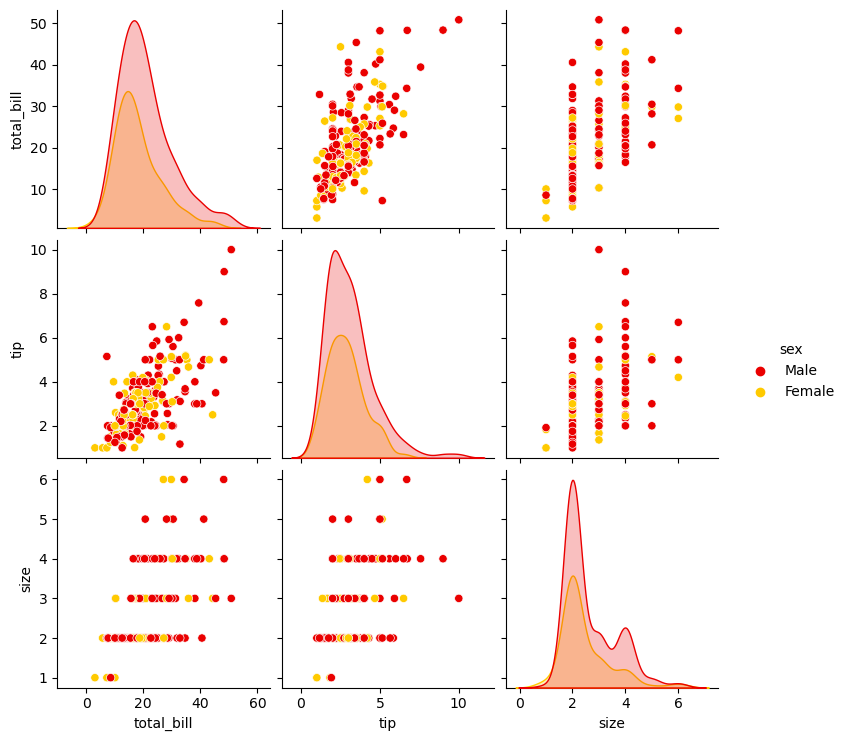

In [48]:
sns.pairplot(tips_df , hue = 'sex', palette = 'hot')

### Rug Plot

<Axes: xlabel='tip'>

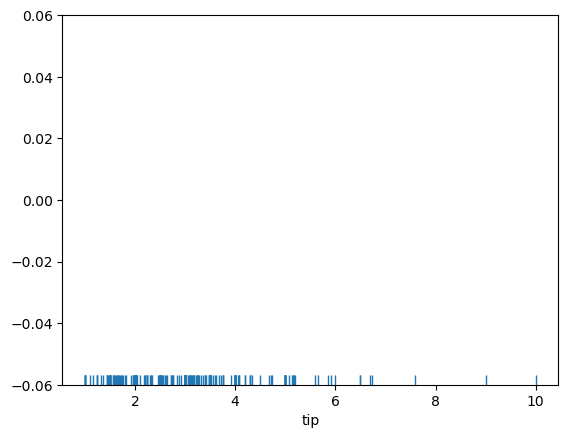

In [49]:
sns.rugplot(tips_df['tip'])

## Styling 

<Figure size 800x400 with 0 Axes>

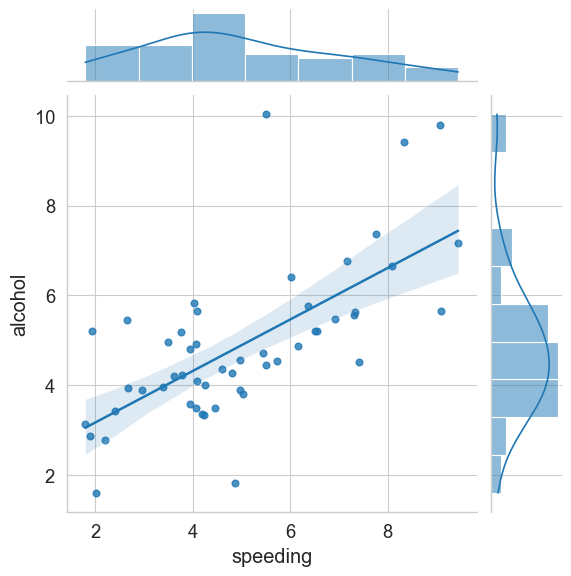

In [55]:
sns.set_style('whitegrid')

plt.figure(figsize = (8,4))

sns.set_context('paper', font_scale= 1.5)

sns.jointplot(x='speeding' , y='alcohol' , data= crash_df, kind= 'reg', )

## Categorical Plots

### Bar Plot

<Axes: xlabel='sex', ylabel='total_bill'>

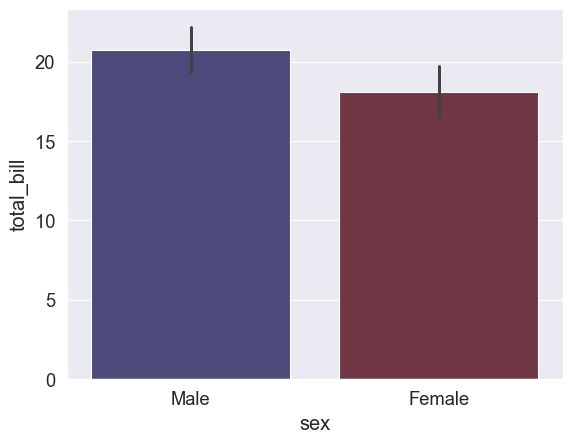

In [63]:
sns.set_style('darkgrid')

sns.barplot(x= 'sex' , y='total_bill' , data= tips_df, palette= 'icefire')

### Count Plot

<Axes: xlabel='sex', ylabel='count'>

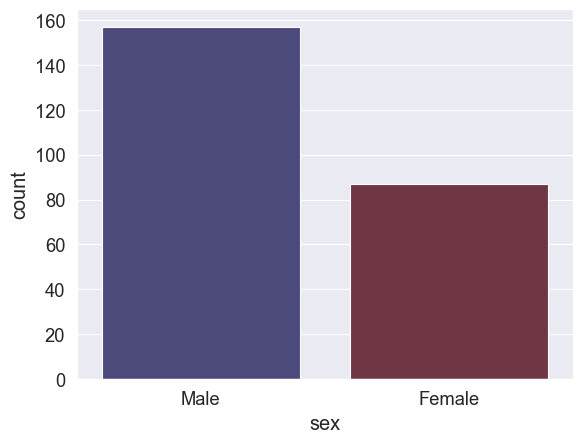

In [65]:
sns.set_style('darkgrid')

sns.countplot(x= 'sex', data= tips_df, palette= 'icefire')

### Box Plot 

<Axes: xlabel='day', ylabel='total_bill'>

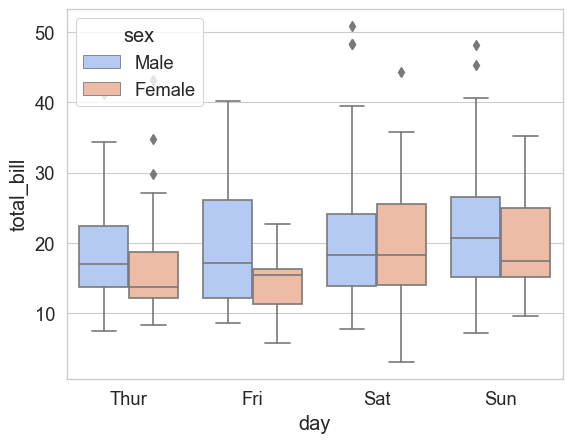

In [69]:
sns.set_style('whitegrid')

sns.boxplot(x= 'day', y= 'total_bill', data= tips_df, hue= 'sex', palette= 'coolwarm' )

### Violin Plot 

<Axes: xlabel='day', ylabel='total_bill'>

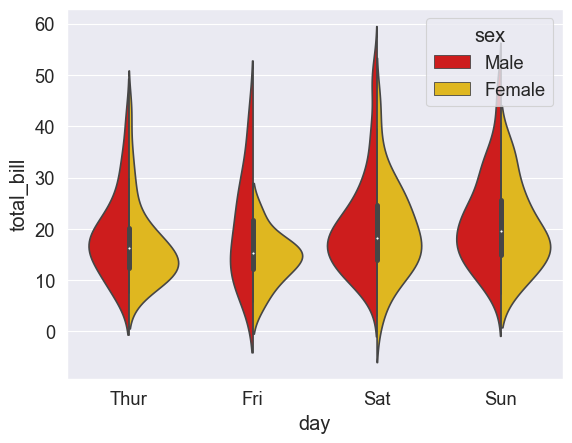

In [71]:
sns.set_style('darkgrid')

sns.violinplot(x= 'day', y= 'total_bill', data= tips_df, hue= 'sex', palette= 'hot', split= True)

### Strip Plot

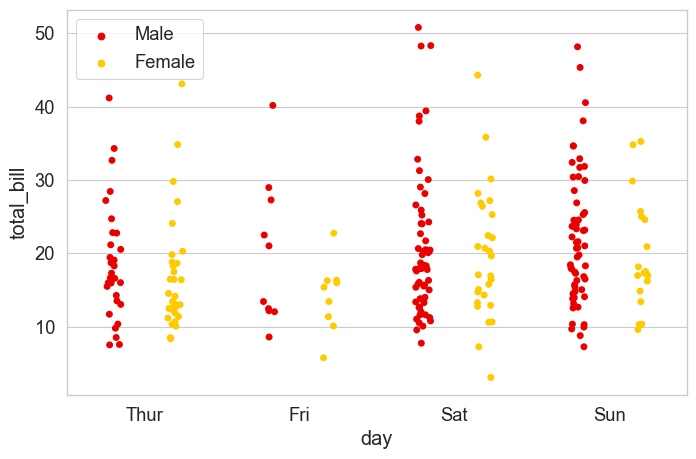

In [80]:
plt.figure(figsize= (8,5))

sns.set_style('whitegrid')

sns.stripplot(x= 'day', y= 'total_bill', data= tips_df, jitter= True, hue= 'sex', palette = 'hot', dodge= True)

plt.legend(loc= 0)

<Axes: xlabel='day', ylabel='total_bill'>

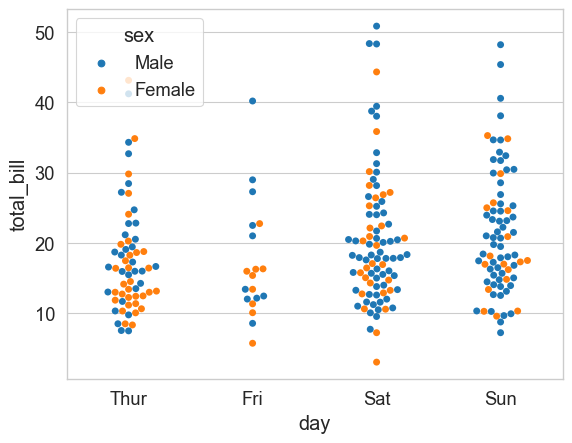

In [91]:
sns.swarmplot(x= 'day', y= 'total_bill', data= tips_df, hue= 'sex')

## Palettes

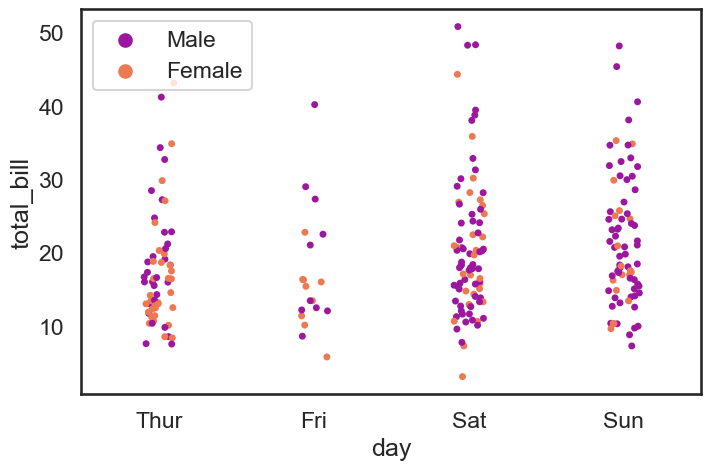

In [101]:
plt.figure(figsize= (8,5))

sns.set_style('white')

sns.set_context('talk')

sns.stripplot(x= 'day', y= 'total_bill', data= tips_df, hue= 'sex', palette= 'plasma')

plt.legend(loc= 2)

## Matrix Plots 

### Heatmaps

C:\Users\media\AppData\Local\Temp\ipykernel_11692\2939041100.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crash_mx = crash_df.corr()


<Axes: >

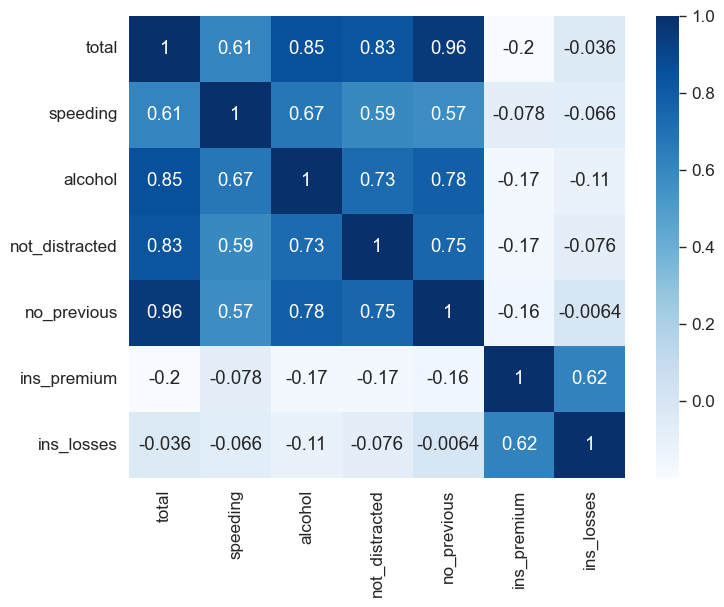

In [108]:
plt.figure(figsize= (8,6))
sns.set_context('paper', font_scale= 1.4)

crash_mx = crash_df.corr()
crash_mx
sns.heatmap(crash_mx, annot= True, cmap= 'Blues')

<Axes: xlabel='year', ylabel='month'>

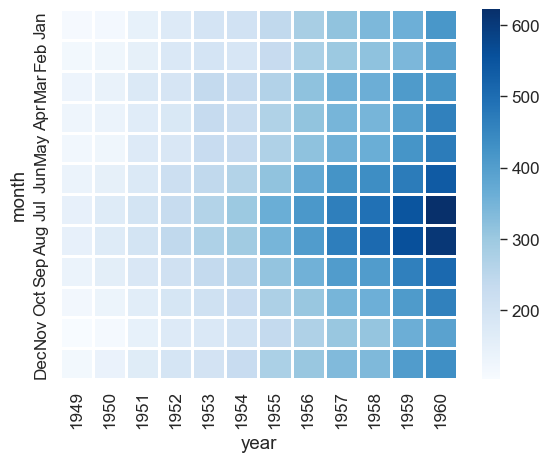

In [120]:
flights_df = sns.load_dataset('flights')
flights_df = flights_df.pivot_table(index= 'month', columns= 'year', values= 'passengers')
sns.heatmap(flights_df, cmap= 'Blues', linecolor= 'white', linewidth= 1)

### Cluster Map

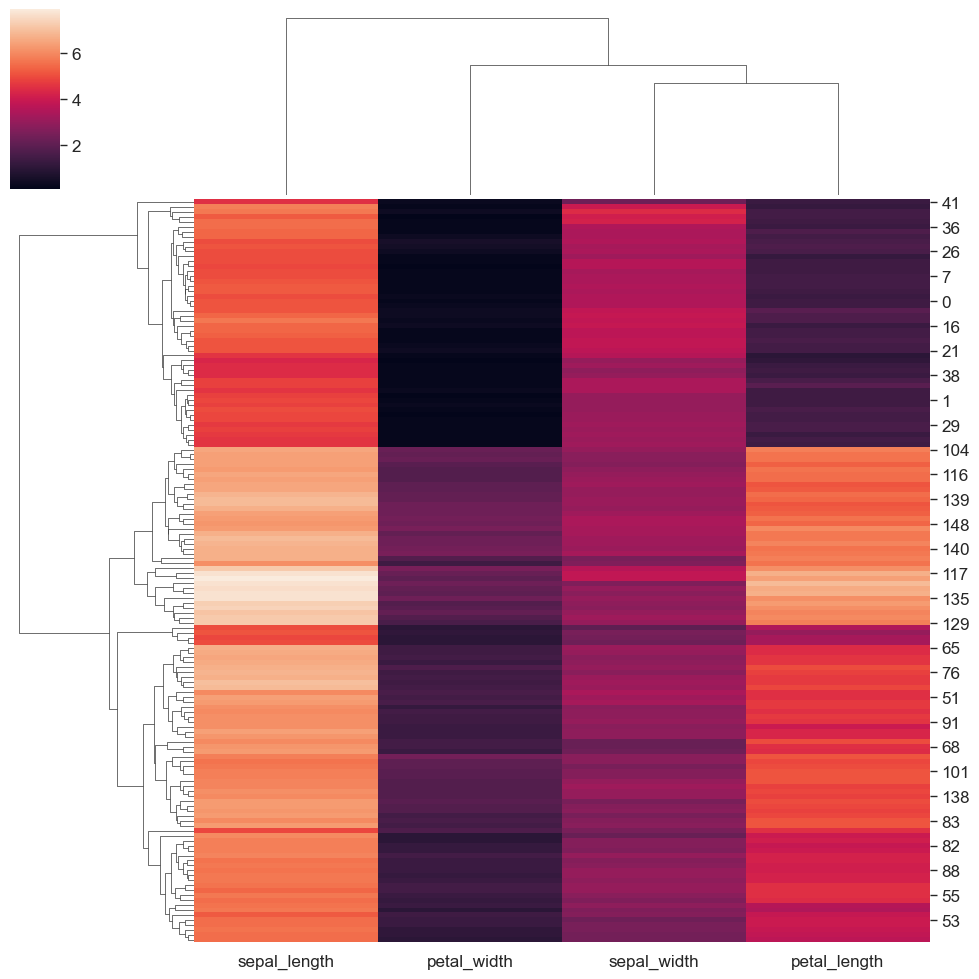

In [126]:
iris = sns.load_dataset('iris')
species = iris.pop('species')
sns.clustermap(iris)

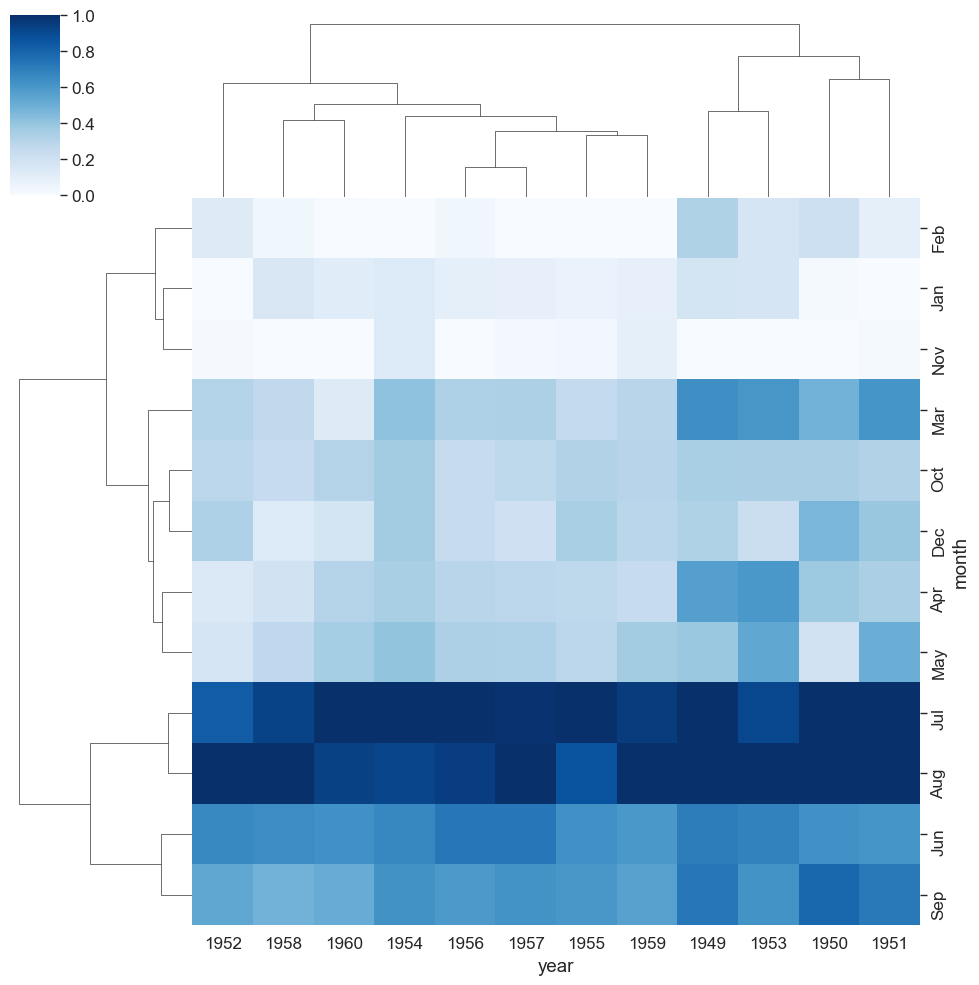

In [128]:
sns.clustermap(flights_df, cmap= 'Blues', standard_scale= 1)

### Pair Grid

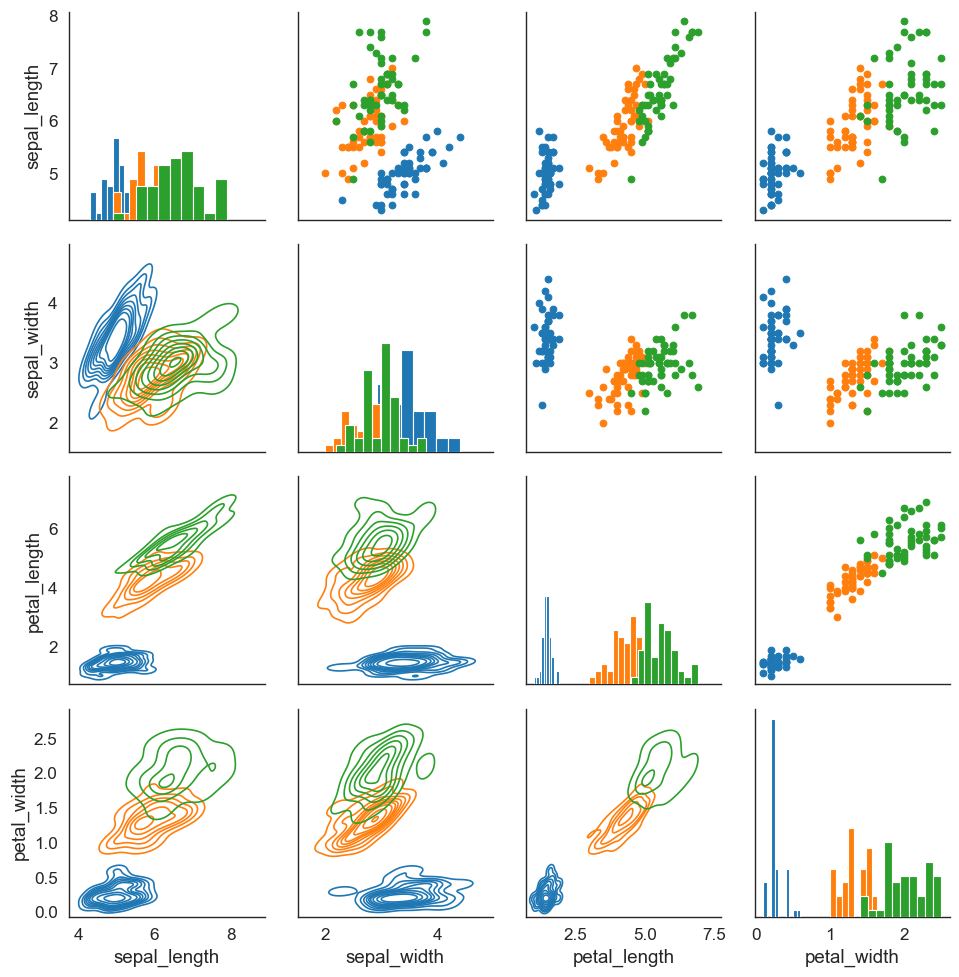

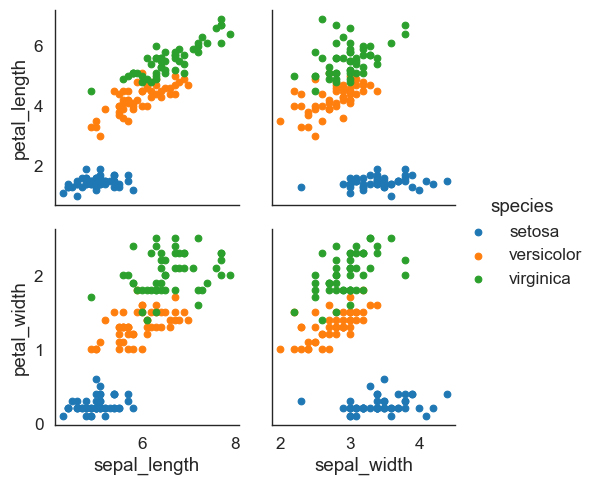

In [145]:
iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue= 'species')
iris_g.map_diag(plt.hist)
iris_g.map_upper(plt.scatter)
iris_g.map_lower(sns.kdeplot)
iris_g = sns.PairGrid(iris, hue= 'species',
                     x_vars= ['sepal_length', 'sepal_width'],
                     y_vars= ['petal_length', 'petal_width'])
iris_g.map(plt.scatter)
iris_g.add_legend()

### Facet Grid

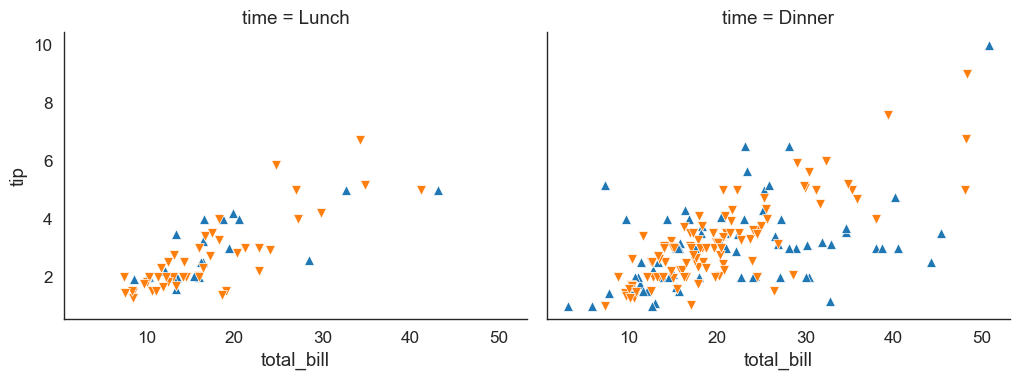

In [156]:
kws = dict(s= 50, linewidth= 0.5, edgecolor= 'w')
tips_fg = sns.FacetGrid(tips_df, col= 'time', hue= 'smoker', height= 4, aspect= 1.3,
                       hue_order= ['Yes', 'No'],
                       hue_kws= dict(marker= ['^', 'v']))
tips_fg.map(plt.scatter, 'total_bill', 'tip', **kws)

### Regression Plot

In [157]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 800x600 with 0 Axes>

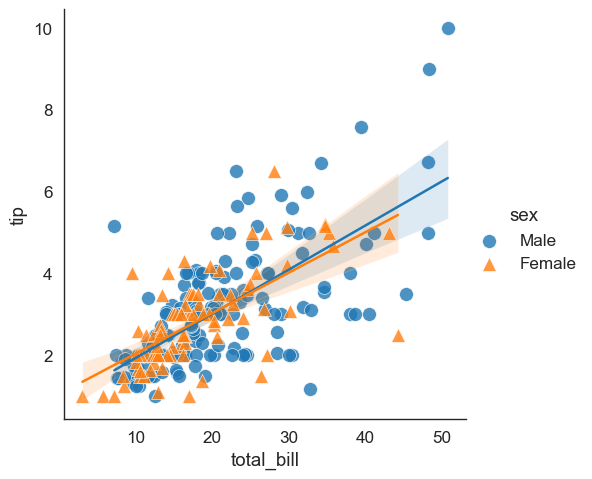

In [159]:
plt.figure(figsize=(8,6))

sns.set_context('paper', font_scale= 1.4)

sns.lmplot(x= 'total_bill', y= 'tip', hue= 'sex', data= tips_df, markers=['o', '^' ],
          scatter_kws= {'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'})

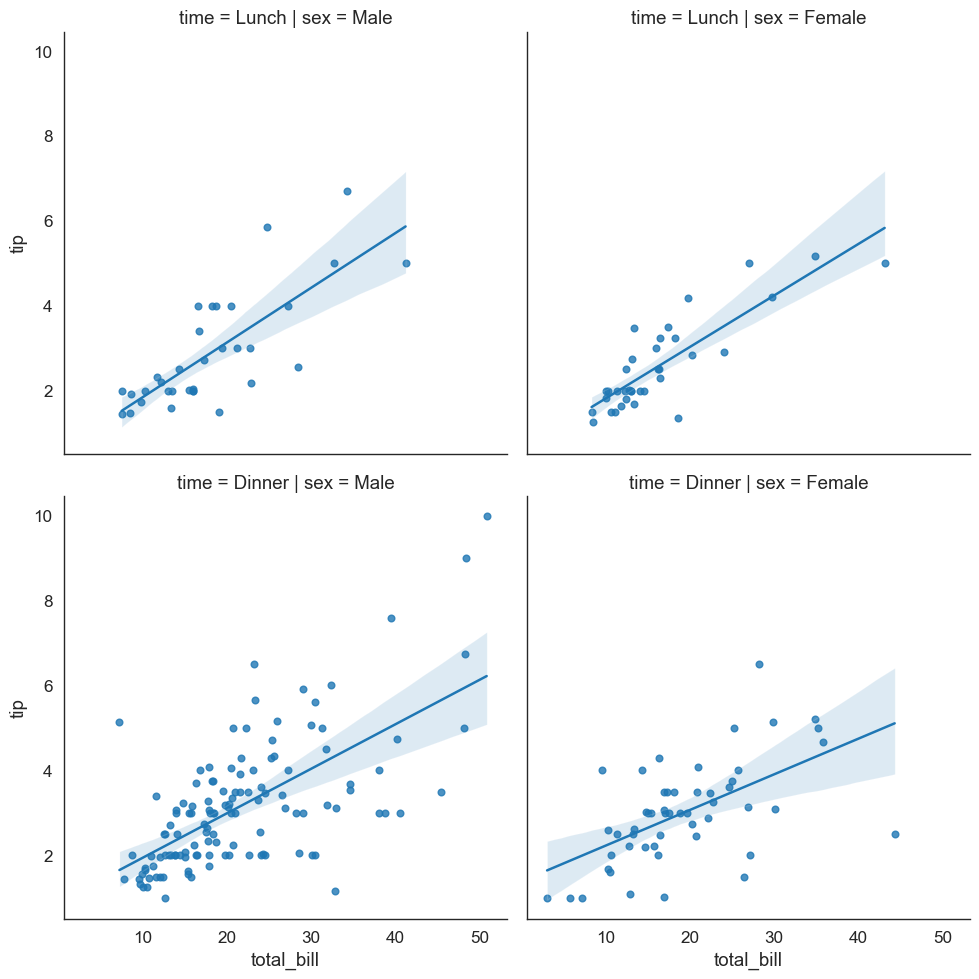

In [165]:
sns.lmplot(x= 'total_bill', y= 'tip', col= 'sex', row= 'time', data= tips_df, palette= 'hot')